In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
bajaj_df = pd.read_csv("/content/drive/MyDrive/stock_analysis/BAJAJFINSV.csv")
bajaj_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [98]:
bajaj_df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3196,2021-04-26,BAJAJFINSV,EQ,9916.65,9992.0,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194163e+14,45113.0,77816,0.1855
3197,2021-04-27,BAJAJFINSV,EQ,10001.75,10000.0,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441072e+14,40414.0,77723,0.2267
3198,2021-04-28,BAJAJFINSV,EQ,10091.35,10200.0,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163556e+15,126354.0,133587,0.1199
3199,2021-04-29,BAJAJFINSV,EQ,10489.30,10540.0,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862822e+15,165425.0,195324,0.1151
3200,2021-04-30,BAJAJFINSV,EQ,11176.55,11000.0,11225.00,10868.70,11021.00,11041.65,11081.78,835355,9.257223e+14,85986.0,129995,0.1556


Column Description
1. Prev Close - Previous day's close price
2. Open and Close - indicates opening and closing price on a particular day
3. Low and High - indicates the lowest and height price on a particular day
4. VWAP - volume weighted average price
5. Last - last traded price on a particular day
6. Volume - indicates total volume of stocks traded on particular day
7. Turnover - indicates total value of stocks traded during a particular period

**List of analysis performed in the notebook**
1. Calculations of Returns
2. Cumulative returns
3. Moving averages
4. Plotting with moving averages
5. Analysis with Dates
6. Volume analysis
7. Deliverables analysis

In [99]:
bajaj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3201 non-null   object 
 1   Symbol              3201 non-null   object 
 2   Series              3201 non-null   object 
 3   Prev Close          3201 non-null   float64
 4   Open                3201 non-null   float64
 5   High                3201 non-null   float64
 6   Low                 3201 non-null   float64
 7   Last                3201 non-null   float64
 8   Close               3201 non-null   float64
 9   VWAP                3201 non-null   float64
 10  Volume              3201 non-null   int64  
 11  Turnover            3201 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3201 non-null   int64  
 14  %Deliverble         3201 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.2

Data considerations

We will consider last three years of data for this analysis from 30-April-2019-2021

We need to remove columns which are not useful for analysis, handling missing values, incorrect values and invalid entries.

In [100]:
bajaj_df = bajaj_df.drop(['Series', 'Symbol'], axis = 1)
bajaj_df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [101]:
bajaj_df.shape

(3201, 13)

NULL represents the null object, it's a reserved word. NULL is perhaps returned by expressions and functions, so that values are undefined.
NA is a logical constant of length 1, which contains a missing value indicator. NA can be freely coerced to any other vector type except raw.

In [102]:
bajaj_df.isna().sum()

Date                    0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                745
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [103]:
bajaj_df.isnull().sum()

Date                    0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                745
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [104]:
percent_trades = bajaj_df['Trades'].isna().sum() / bajaj_df.shape[0]
print('Percentage of missing trade values = {:.2f} %'.format(100 * percent_trades))

Percentage of missing trade values = 23.27 %


In [105]:
bajaj_df = bajaj_df.dropna()

In [106]:
bajaj_df = bajaj_df.reset_index(drop = True)

In [107]:
bajaj_df.isnull().sum()

Date                  0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

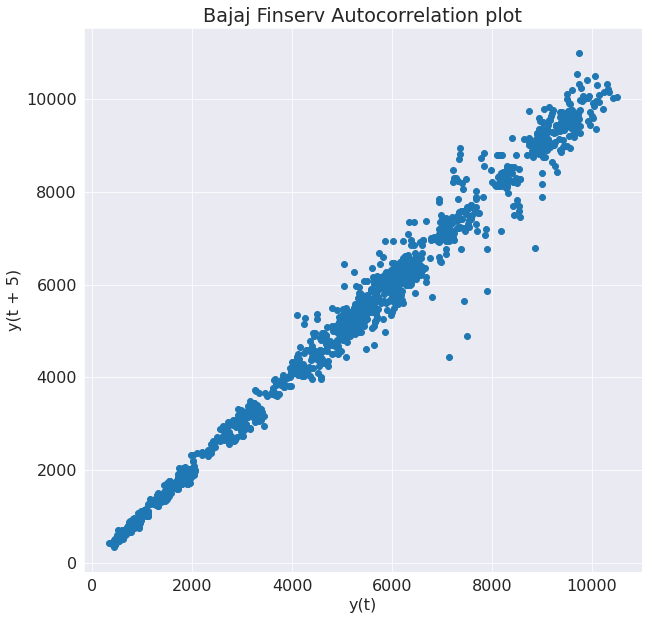

In [108]:
from pandas.plotting import lag_plot
plt.figure(figsize = (10, 10))
lag_plot(bajaj_df['Open'], lag = 5)
plt.title('Bajaj Finserv Autocorrelation plot');

# **Exploratory Data Analysis**

In this part of the analysis, we will calculate

1. Sum
2. mean
3. Standard deviation
4. Ranges
5. Computation on numerical columns
6. Relationship between columns using plots, bar charts
7. Using histograms for distributions of columns
8. Finding insights from the analysis

In [16]:
start_date = "2019-04-30"
end_date = "2021-04-30"

In [17]:
mask = (bajaj_df['Date'] >= start_date) & (bajaj_df['Date'] <= end_date)

In [18]:
bajaj_df1 = bajaj_df.loc[mask]

In [19]:
bajaj_df1.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1959,2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.0,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941
1960,2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211
1961,2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821
1962,2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790
1963,2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350


In [20]:
bajaj_df1.index

Int64Index([1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
            ...
            2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455],
           dtype='int64', length=497)

In [21]:
bajaj_df1 = bajaj_df1.reset_index(drop = True)

In [22]:
bajaj_df1.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.0,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941
1,2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211
2,2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821
3,2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790
4,2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350


In [23]:
bajaj_df1.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,4.970000e+02,4.970000e+02,497.000000,497.000000,497.000000
mean,7698.384708,7711.385513,7831.408451,7585.501207,7706.156942,7705.065594,7710.102817,6.263482e+05,4.460238e+14,63093.219316,117631.323944,0.210097
std,1671.993304,1667.603402,1668.050425,1679.892763,1676.673453,1678.705143,1675.441006,5.492713e+05,3.765258e+14,48930.583680,96743.483115,0.084568
min,4097.250000,4100.000000,4276.950000,3985.300000,4095.200000,4097.250000,4144.520000,4.175500e+04,3.346669e+13,5011.000000,9700.000000,0.063700
25%,6269.100000,6285.000000,6375.000000,6188.400000,6266.000000,6269.100000,6280.590000,2.697180e+05,2.147026e+14,30144.000000,53879.000000,0.150400
50%,8121.300000,8141.000000,8245.000000,8035.000000,8104.000000,8125.200000,8145.260000,4.698110e+05,3.422421e+14,48856.000000,91468.000000,0.195400
75%,9095.650000,9135.000000,9250.000000,9015.200000,9100.000000,9104.250000,9133.130000,7.864960e+05,5.286955e+14,80649.000000,148453.000000,0.256400
max,11176.550000,11000.000000,11300.000000,10868.700000,11175.450000,11176.550000,11081.780000,4.110412e+06,3.394379e+15,312959.000000,875036.000000,0.595500


**Stock price plotting**

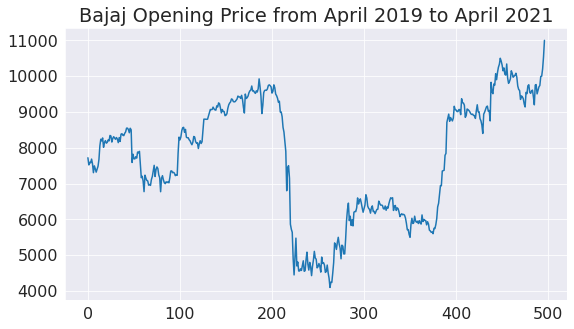

In [24]:
bajaj_df1['Open'].plot()
plt.title("Bajaj Opening Price from April 2019 to April 2021")
plt.show()

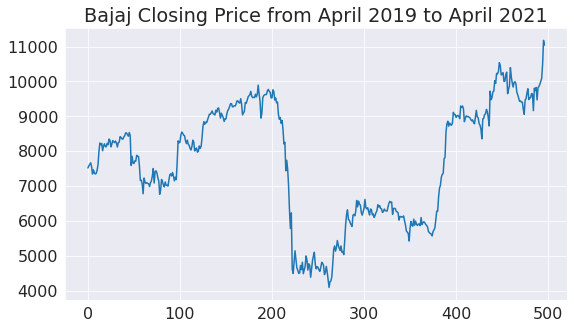

In [25]:
bajaj_df1['Close'].plot()
plt.title("Bajaj Closing Price from April 2019 to April 2021")
plt.show()

In [26]:
AvgHigh = bajaj_df1.describe()['High']['mean']
AvgLow = bajaj_df1.describe()['Low']['mean']
AvgVolume = bajaj_df1.describe()['Volume']['mean']
AvgDeliverable_volume = bajaj_df1.describe()['Deliverable Volume']['mean']

print("Average High Bajaj Finserv: ", AvgHigh,
     "\nAverage Low Bajaj Finserv: ", AvgLow,
     "\nAverage Volume for Bajaj Finserv: ", AvgVolume,
     "\nAverage Deliverable Volume of Bajaj Finserv: ", AvgDeliverable_volume)

Average High Bajaj Finserv:  7831.408450704225 
Average Low Bajaj Finserv:  7585.50120724346 
Average Volume for Bajaj Finserv:  626348.2394366197 
Average Deliverable Volume of Bajaj Finserv:  117631.32394366198


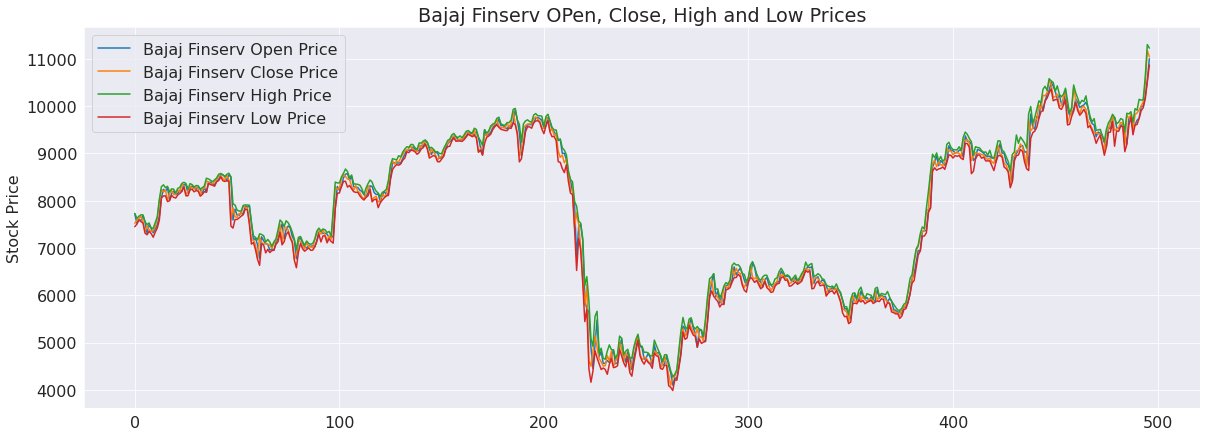

In [27]:
plt.figure(figsize = (20, 7));
bajaj_df1['Open'].plot(label = 'Bajaj Finserv Open Price')
bajaj_df1['Close'].plot(label = 'Bajaj Finserv Close Price')
bajaj_df1['High'].plot(label = 'Bajaj Finserv High Price')
bajaj_df1['Low'].plot(label = 'Bajaj Finserv Low Price')
plt.legend()
plt.title('Bajaj Finserv OPen, Close, High and Low Prices')
plt.ylabel("Stock Price")
plt.show()

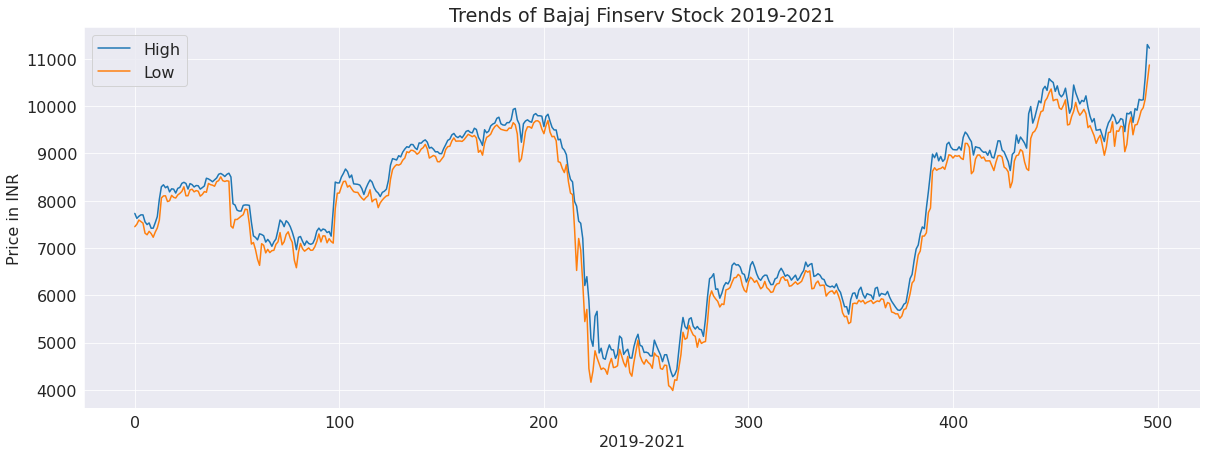

In [28]:
plt.figure(figsize = (20, 7))
bajaj_df1['High'].plot(label = 'Bajaj Finserv High Price')
bajaj_df1['Low'].plot(label = 'Bajaj Finserv Low Price')
plt.title("Trends of Bajaj Finserv Stock 2019-2021")
plt.xlabel('2019-2021')
plt.ylabel('Price in INR')
plt.legend(['High', 'Low'])

Volume Weighted Average Price (VWAP) is a measrurement that shows the average price of a security, adjusted for its volume. VWAP is a trading benchmark used by traders that gives the average price the stock has traded at throughout the day, based on both volume and price.

A histogram is a graph that represents the probability distribution of a dataset. The heights of the bars indicate the frequencies or probabilities for the different values.

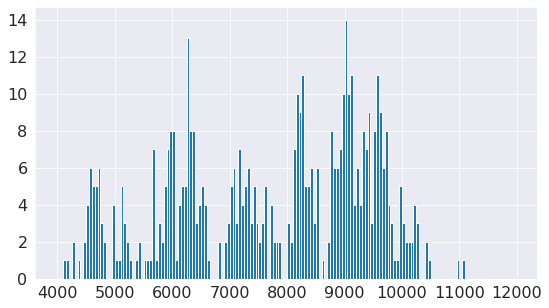

In [29]:
plt.hist(bajaj_df1.VWAP, bins = np.arange(4000, 12000, 50));

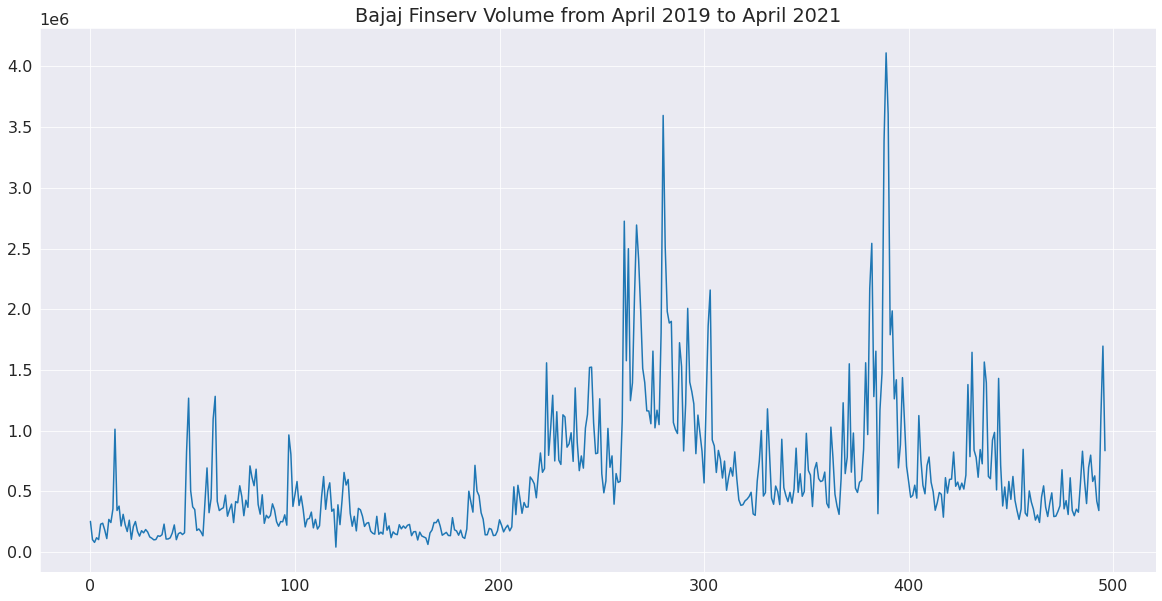

In [30]:
bajaj_df1['Volume'].plot(figsize = (20, 10))
plt.title("Bajaj Finserv Volume from April 2019 to April 2021")
plt.show()

Maximum volume of trades that happened on a day throughout 2019 to 2021

In [31]:
bajaj_df1.iloc[[bajaj_df1['Volume'].argmax()]]

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
389,2020-11-20,7823.4,7843.0,8588.65,7843.0,8548.8,8542.6,8258.0,4110412,3.394379e+15,312959.0,439796,0.107


Visualise any particular portion of the stocks trading

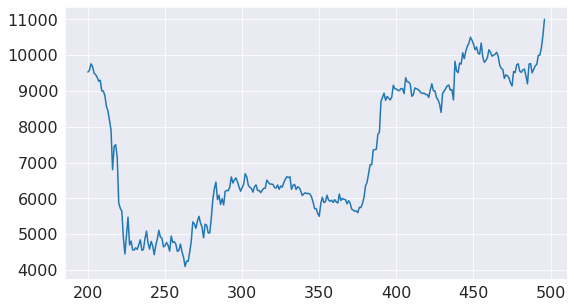

In [32]:
spike = bajaj_df1.iloc[200:2000]
spike['Open'].plot()

Deliverable volume is the quantity of shares which actually move from one set of people (who had those shares in their demat account before today and are selling today) to another set of people (who have purchased those shares and will get those shares by T+2 days in their demat account)

In [33]:
bajaj_df1['Intraday Volume'] = bajaj_df1['Volume'] - bajaj_df1['Deliverable Volume']
bajaj_df1.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
0,2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.0,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941,153540
1,2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211,91009
2,2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821,65780
3,2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790,97559
4,2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350,79219


Pie chart shows percantages of long term and short term investors

Text(0.5, 1.0, 'Types of Volume in Bajaj Finserv Stocks')

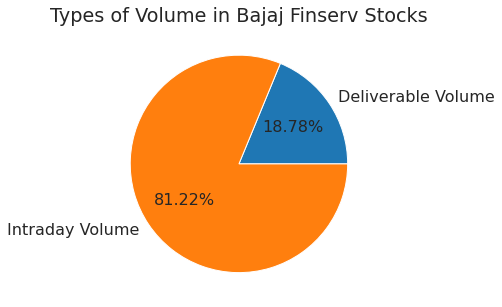

In [34]:
piechart_vars = ['Deliverable Volume', 'Intraday Volume'];
piechart_values = [bajaj_df1['Deliverable Volume'].sum(), bajaj_df1['Intraday Volume'].sum()]
plt.pie(piechart_values, labels = piechart_vars, autopct = "%1.2f%%");
plt.title('Types of Volume in Bajaj Finserv Stocks');

Top 5 trades that happened in Bajaj Finserv stock from 2019 till 2021, with the prices

In [35]:
bajaj_df1.sort_values(by = 'Trades', ascending = False).head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
389,2020-11-20,7823.40,7843.00,8588.65,7843.00,8548.8,8542.60,8258.00,4110412,3.394379e+15,312959.0,439796,0.1070,3670616
390,2020-11-23,8542.60,8710.00,8982.65,8621.00,8700.1,8774.35,8788.34,3607587,3.170471e+15,309075.0,592734,0.1643,3014853
267,2020-06-02,4763.20,4793.95,5238.00,4742.65,5216.0,5184.70,5011.28,2693375,1.349726e+15,293610.0,408098,0.1515,2285277
280,2020-06-19,5427.55,5450.00,5970.30,5443.80,5925.0,5899.80,5699.38,3595572,2.049252e+15,270280.0,875036,0.2434,2720536
388,2020-11-19,7789.95,7789.95,8199.90,7750.00,7803.0,7823.40,8004.76,3387040,2.711244e+15,260576.0,374277,0.1105,3012763


Top 5 highest trades value

In [36]:
bajaj_df1.sort_values(by = 'Trades', ascending = False).head()['High']

389    8588.65
390    8982.65
267    5238.00
280    5970.30
388    8199.90
Name: High, dtype: float64

Top 5 highest prices

In [37]:
bajaj_df1.sort_values(by = 'High', ascending = False).head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
495,2021-04-29,10489.30,10540.0,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862822e+15,165425.0,195324,0.1151,1501174
496,2021-04-30,11176.55,11000.0,11225.00,10868.70,11021.00,11041.65,11081.78,835355,9.257223e+14,85986.0,129995,0.1556,705360
494,2021-04-28,10091.35,10200.0,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163556e+15,126354.0,133587,0.1199,980294
447,2021-02-15,10278.80,10330.2,10579.00,10280.00,10500.00,10537.70,10486.75,536406,5.625157e+14,50301.0,69675,0.1299,466731
448,2021-02-16,10537.70,10500.0,10532.00,10361.00,10460.00,10460.60,10444.86,358604,3.745570e+14,34451.0,30458,0.0849,328146


Top 10 lowest price

In [38]:
Low_10_price = bajaj_df1.sort_values(by = 'Low', ascending = True).head(10)
Low_10_price

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
263,2020-05-27,4097.25,4100.0,4276.95,3985.30,4250.00,4258.05,4144.52,2498693,1.035587e+15,193792.0,420201,0.1682,2078492
262,2020-05-26,4315.55,4360.0,4400.00,4051.80,4095.20,4097.25,4189.02,1575820,6.601142e+14,165078.0,411544,0.2612,1164276
261,2020-05-22,4539.20,4509.1,4578.45,4087.00,4330.00,4315.55,4299.75,2725018,1.171690e+15,256385.0,486592,0.1786,2238426
223,2020-03-24,4621.05,4900.0,5080.00,4160.25,4600.00,4497.75,4551.60,1558786,7.094971e+14,209363.0,352137,0.2259,1206649
265,2020-05-29,4285.95,4240.0,4428.95,4201.50,4392.55,4404.90,4372.54,1394430,6.097200e+14,101394.0,364969,0.2617,1029461
264,2020-05-28,4258.05,4250.0,4325.00,4211.85,4280.00,4285.95,4276.94,1247257,5.334449e+14,109551.0,222025,0.1780,1025232
243,2020-04-27,4389.80,4430.2,4670.00,4288.00,4661.60,4617.50,4516.10,1133888,5.120751e+14,121200.0,208511,0.1839,925377
231,2020-04-07,4510.75,4620.0,4818.80,4329.05,4771.95,4724.90,4495.38,1130738,5.083093e+14,201918.0,251431,0.2224,879307
242,2020-04-24,4729.60,4675.0,4675.00,4365.00,4410.00,4389.80,4479.98,1022043,4.578734e+14,130334.0,331038,0.3239,691005
224,2020-03-25,4497.75,4450.0,4920.00,4400.05,4902.00,4830.30,4698.82,797273,3.746241e+14,135939.0,177677,0.2229,619596


Text(0.5, 1.0, '10 lowest price of Bajaj Finserv Stock')

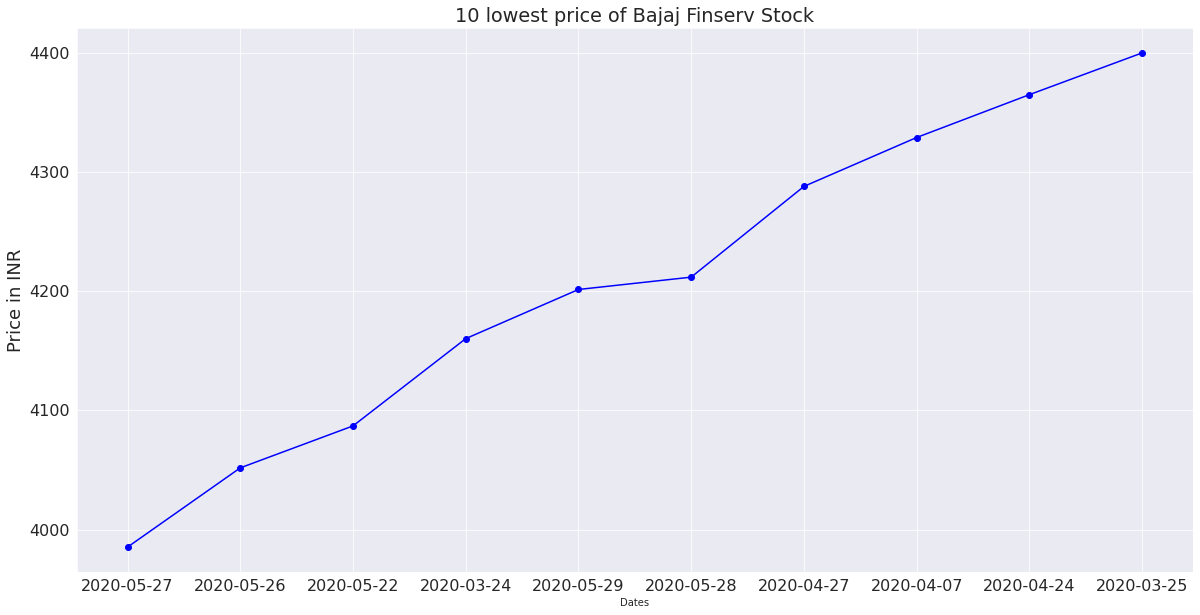

In [39]:
plt.figure(figsize = (20, 10))
plt.plot(Low_10_price.Date, Low_10_price.Low,'o-b')
plt.xlabel('Dates', size = 10)
plt.ylabel('Price in INR', size = 18)
plt.title('10 lowest price of Bajaj Finserv Stock')

Highest turover for Bajaj Finserv in 2019-2021

In [40]:
bajaj_df1.sort_values(by = 'Turnover', ascending = False).head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
389,2020-11-20,7823.40,7843.00,8588.65,7843.0,8548.80,8542.60,8258.00,4110412,3.394379e+15,312959.0,439796,0.1070,3670616
390,2020-11-23,8542.60,8710.00,8982.65,8621.0,8700.10,8774.35,8788.34,3607587,3.170471e+15,309075.0,592734,0.1643,3014853
388,2020-11-19,7789.95,7789.95,8199.90,7750.0,7803.00,7823.40,8004.76,3387040,2.711244e+15,260576.0,374277,0.1105,3012763
280,2020-06-19,5427.55,5450.00,5970.30,5443.8,5925.00,5899.80,5699.38,3595572,2.049252e+15,270280.0,875036,0.2434,2720536
495,2021-04-29,10489.30,10540.00,11300.00,10520.0,11175.45,11176.55,10980.40,1696498,1.862822e+15,165425.0,195324,0.1151,1501174


Highest % Deliverable for Bajaj Finserv in 2019-2021

In [41]:
bajaj_df1.sort_values(by = '%Deliverble', ascending = False).head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
177,2020-01-17,9622.15,9614.0,9740.3,9601.0,9725.00,9715.00,9678.16,284129,2.749845e+14,24884.0,169199,0.5955,114930
140,2019-11-26,9175.00,9170.0,9215.0,9089.6,9121.35,9121.30,9149.88,295094,2.700076e+14,34027.0,159844,0.5417,135250
36,2019-06-21,8417.85,8382.0,8459.0,8363.5,8383.00,8392.45,8406.07,230915,1.941088e+14,27015.0,123068,0.5330,107847
21,2019-05-30,8131.75,8150.0,8260.0,8120.0,8199.90,8226.90,8207.64,211411,1.735185e+14,16814.0,103128,0.4878,108283
19,2019-05-28,8213.05,8200.0,8242.5,8069.5,8100.00,8128.55,8145.26,263409,2.145536e+14,29858.0,126208,0.4791,137201


Increase in deliverable % shows a strong sign that long term investors are interested (entering) in this particular stock.

Moving Averages

In [42]:
bajaj_ma = bajaj_df1
bajaj_ma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                497 non-null    object 
 1   Prev Close          497 non-null    float64
 2   Open                497 non-null    float64
 3   High                497 non-null    float64
 4   Low                 497 non-null    float64
 5   Last                497 non-null    float64
 6   Close               497 non-null    float64
 7   VWAP                497 non-null    float64
 8   Volume              497 non-null    int64  
 9   Turnover            497 non-null    float64
 10  Trades              497 non-null    float64
 11  Deliverable Volume  497 non-null    int64  
 12  %Deliverble         497 non-null    float64
 13  Intraday Volume     497 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 54.5+ KB


Moving Averages

A rolling average/moving average is a metric that calculates trends over short periods of time using a set of data. If the price is above a moving average, the trend is up. If the price is below a moving average, the trend is down.

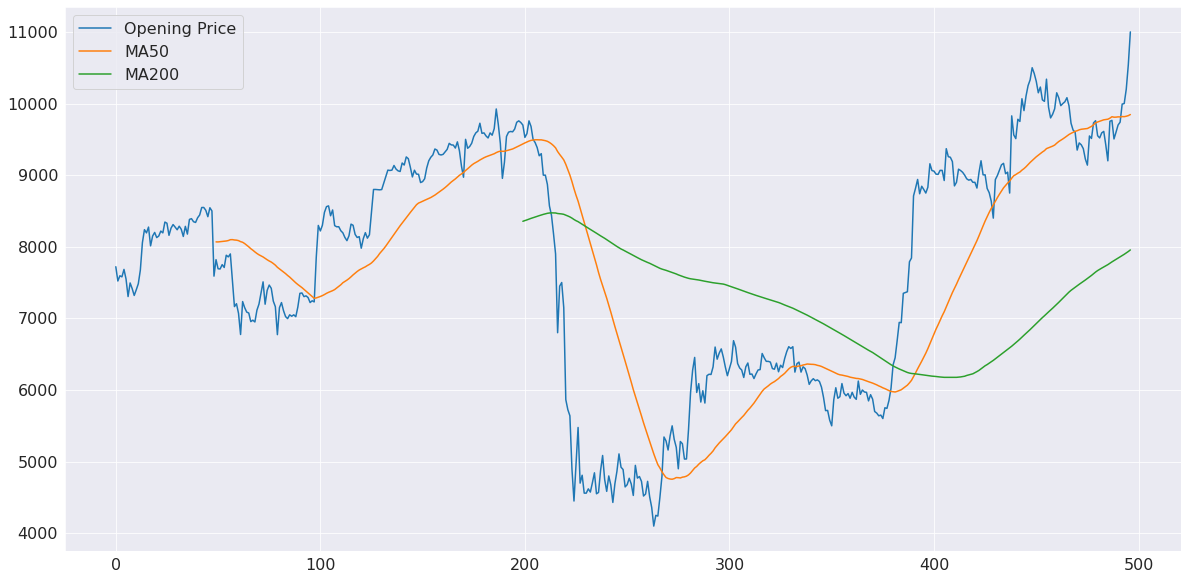

In [43]:
bajaj_ma['Open'].plot(label = "Opening Price", figsize = (20, 10))
bajaj_ma['MA50'] = bajaj_ma['Open'].rolling(50).mean()
bajaj_ma['MA50'].plot(label = 'MA50')
bajaj_ma['MA200'] = bajaj_ma['Open'].rolling(200).mean()
bajaj_ma['MA200'].plot(label = 'MA200')
plt.legend();

 %Change - Calculating and Adding Returns column

In [44]:
bajaj_ma['Returns'] = (bajaj_ma['Close']/ bajaj_ma['Close'].shift(1)) - 1

In [45]:
bajaj_ma.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume,MA50,MA200,Returns
0,2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.0,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941,153540,NaN,NaN,NaN
1,2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211,91009,NaN,NaN,0.007765
2,2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821,65780,NaN,NaN,0.005984
3,2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790,97559,NaN,NaN,0.005738
4,2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350,79219,NaN,NaN,-0.013824


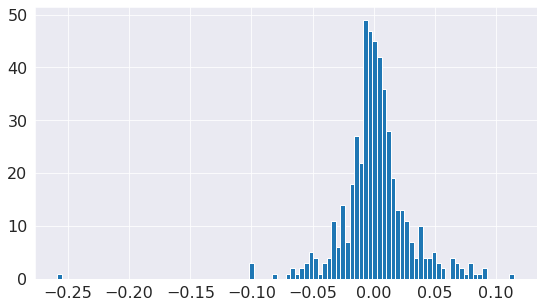

In [46]:
bajaj_ma['Returns'].hist(bins = 100);

Probablity density

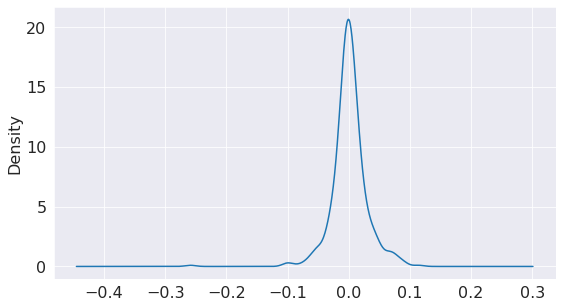

In [47]:
bajaj_ma['Returns'].plot(kind = 'kde', label = 'Bajaj Finserv');

 Calculating Cumulative Return

In [48]:
bajaj_ma['Cumulative Return'] = (1 + bajaj_ma['Returns']).cumprod()

In [49]:
bajaj_ma.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume,MA50,MA200,Returns,Cumulative Return
0,2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.0,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941,153540,NaN,NaN,NaN,NaN
1,2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211,91009,NaN,NaN,0.007765,1.007765
2,2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821,65780,NaN,NaN,0.005984,1.013796
3,2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790,97559,NaN,NaN,0.005738,1.019613
4,2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350,79219,NaN,NaN,-0.013824,1.005518


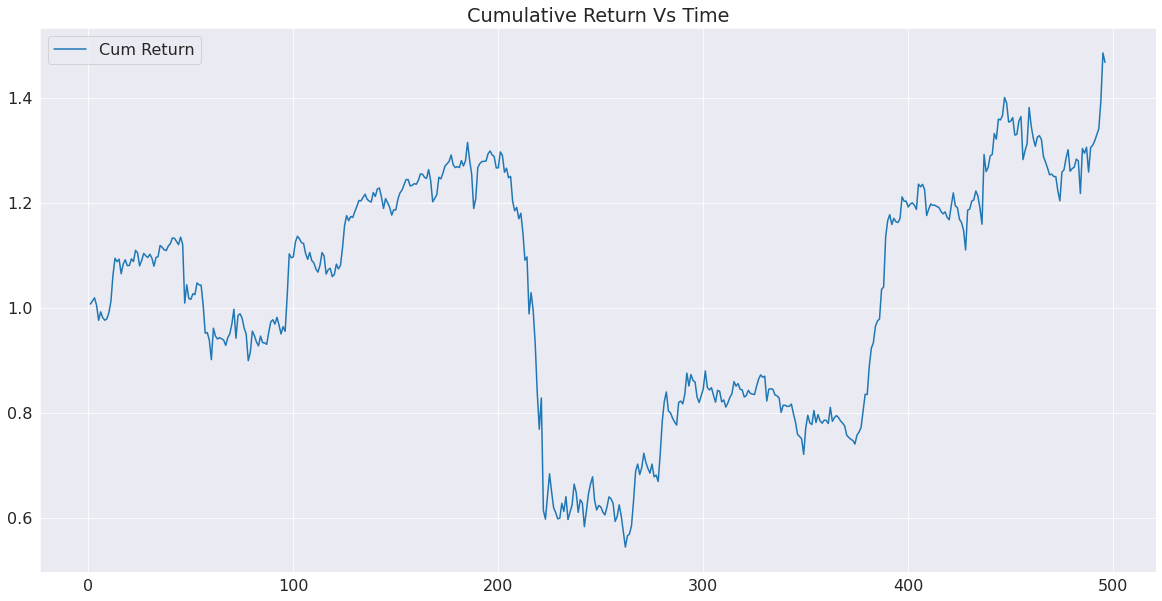

In [50]:
bajaj_ma['Cumulative Return'].plot(label = 'Cum Return', figsize = (20, 10))
plt.title("Cumulative Return Vs Time")
plt.legend()

In [51]:
bajaj_df2 = bajaj_df
bajaj_df2.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2011-06-01,518.40,521.8,528.95,517.1,521.10,521.05,522.81,113360,5.926609e+12,4155.0,34098,0.3008
1,2011-06-02,521.05,518.8,519.85,504.0,514.95,512.45,513.71,62967,3.234650e+12,2437.0,21069,0.3346
2,2011-06-03,512.45,512.5,520.00,506.0,507.10,508.40,513.11,36445,1.870040e+12,1754.0,10702,0.2936
3,2011-06-06,508.40,508.0,508.00,496.0,502.25,502.25,501.92,33537,1.683281e+12,1346.0,14215,0.4239
4,2011-06-07,502.25,503.0,552.00,503.0,546.50,545.50,536.79,1237385,6.642112e+13,36245.0,216387,0.1749


In [52]:
#bajaj_df2 =  bajaj_df2.drop('index', axis=1)
#bajaj_df2.head()

In [53]:
start_date = "2019-04-30"
end_date = "2021-04-30"
mask = (bajaj_df2['Date'] >= start_date) & (bajaj_df2['Date'] <= end_date)
bajaj_df2 = bajaj_df2.loc[mask]
bajaj_df2

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1959,2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.00,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941
1960,2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.00,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211
1961,2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.00,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821
1962,2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.80,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790
1963,2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.00,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,2021-04-26,9916.65,9992.00,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194163e+14,45113.0,77816,0.1855
2452,2021-04-27,10001.75,10000.00,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441072e+14,40414.0,77723,0.2267
2453,2021-04-28,10091.35,10200.00,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163556e+15,126354.0,133587,0.1199
2454,2021-04-29,10489.30,10540.00,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862822e+15,165425.0,195324,0.1151


 Converting Date into Datetime

In [54]:
bajaj_df2['Date'] = pd.to_datetime(bajaj_df2['Date'])
bajaj_df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1959,2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.0,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941
1960,2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211
1961,2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821
1962,2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790
1963,2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350


In [55]:
bajaj_df2 = bajaj_df2.set_index('Date')
bajaj_df2.index

DatetimeIndex(['2019-04-30', '2019-05-02', '2019-05-03', '2019-05-06',
               '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10',
               '2019-05-13', '2019-05-14',
               ...
               '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22',
               '2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='Date', length=497, freq=None)

 Finding data for a month

In [56]:
bajaj_df2.loc['2019-05'].head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2019-05-02,7520.45,7522.0,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211
2019-05-03,7578.85,7595.0,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821
2019-05-06,7624.20,7580.0,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790
2019-05-07,7667.95,7684.0,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350
2019-05-08,7561.95,7550.0,7551.00,7312.30,7345.0,7345.75,7403.36,230383,1.705609e+14,30277.0,59811,0.2596


Average price for the month of April 2021

In [57]:
bajaj_df2.loc['2021-04'].Close.mean()

9895.199999999997

Monthly average of close price

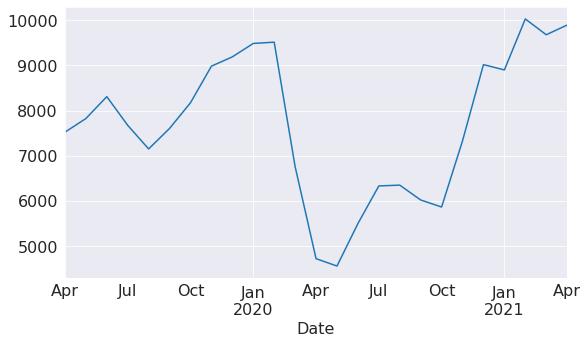

In [58]:
bajaj_df2.Close.resample('M').mean().plot();

Finding last business day for each month

In [59]:
bajaj_df2.resample('M').last()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.00,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941
2019-05-31,8226.90,8219.00,8279.00,8152.65,8194.00,8187.95,8214.61,252199,2.071716e+14,25099.0,86018,0.3411
2019-06-30,8443.90,8443.90,8557.85,8423.80,8549.90,8524.65,8488.76,224278,1.903843e+14,27897.0,89954,0.4011
2019-07-31,7078.05,7088.00,7123.20,6895.00,7089.90,7097.85,7024.59,356118,2.501583e+14,41618.0,39244,0.1102
2019-08-31,6979.85,6997.00,7146.55,6965.00,7122.05,7119.55,7055.35,472409,3.333009e+14,50448.0,83688,0.1772
2019-09-30,8550.35,8560.00,8668.80,8410.35,8497.90,8513.00,8543.45,462717,3.953201e+14,53309.0,93708,0.2025
2019-10-31,8082.40,8120.00,8241.95,8100.00,8130.00,8134.35,8179.30,423287,3.462192e+14,36910.0,175782,0.4153
2019-11-30,9240.10,9230.00,9235.80,9095.30,9118.90,9110.25,9155.10,148877,1.362984e+14,21054.0,38263,0.2570
2019-12-31,9439.20,9422.40,9444.95,9379.00,9420.00,9393.35,9415.62,116732,1.099104e+14,11628.0,33658,0.2883


Get the last business day of each Quarter from April-2019

In [60]:
bajaj_df2.resample('Q').last()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2019-06-30,8443.90,8443.90,8557.85,8423.80,8549.90,8524.65,8488.76,224278,1.903843e+14,27897.0,89954,0.4011
2019-09-30,8550.35,8560.00,8668.80,8410.35,8497.90,8513.00,8543.45,462717,3.953201e+14,53309.0,93708,0.2025
2019-12-31,9439.20,9422.40,9444.95,9379.00,9420.00,9393.35,9415.62,116732,1.099104e+14,11628.0,33658,0.2883
2020-03-31,4661.15,4810.00,4879.55,4430.00,4600.00,4591.20,4562.22,1156179,5.274737e+14,201921.0,290947,0.2516
2020-06-30,5890.20,5990.00,6043.65,5815.80,5833.30,5845.15,5896.32,976674,5.758783e+14,96510.0,71495,0.0732
2020-09-30,5876.70,5885.00,5929.00,5820.00,5851.00,5852.35,5866.40,375600,2.203421e+14,34577.0,28212,0.0751
2020-12-31,8961.70,8949.00,9030.00,8840.00,8885.40,8906.35,8930.62,476050,4.251420e+14,39943.0,120692,0.2535
2021-03-31,9502.35,9512.35,9715.60,9450.00,9677.85,9668.60,9621.86,424140,4.081015e+14,57784.0,154494,0.3643
2021-06-30,11176.55,11000.00,11225.00,10868.70,11021.00,11041.65,11081.78,835355,9.257223e+14,85986.0,129995,0.1556


Percentage change between the current and a prior element

In [61]:
bajaj_df2['Return'] = bajaj_df2['Close'].pct_change(1)
bajaj_df2.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Return
Date,,,,,,,,,,,,,
2019-04-30,7721.25,7721.25,7730.00,7449.15,7515.0,7520.45,7582.77,253399,1.921466e+14,22564.0,99859,0.3941,NaN
2019-05-02,7520.45,7522.00,7625.00,7500.85,7595.0,7578.85,7581.62,103551,7.850848e+13,13008.0,12542,0.1211,0.007765
2019-05-03,7578.85,7595.00,7669.90,7590.00,7610.0,7624.20,7633.59,80422,6.139088e+13,10009.0,14642,0.1821,0.005984
2019-05-06,7624.20,7580.00,7699.75,7557.60,7684.8,7667.95,7645.28,118824,9.084427e+13,13727.0,21265,0.1790,0.005738
2019-05-07,7667.95,7684.00,7698.75,7525.00,7553.0,7561.95,7609.73,103553,7.880102e+13,15771.0,24334,0.2350,-0.013824


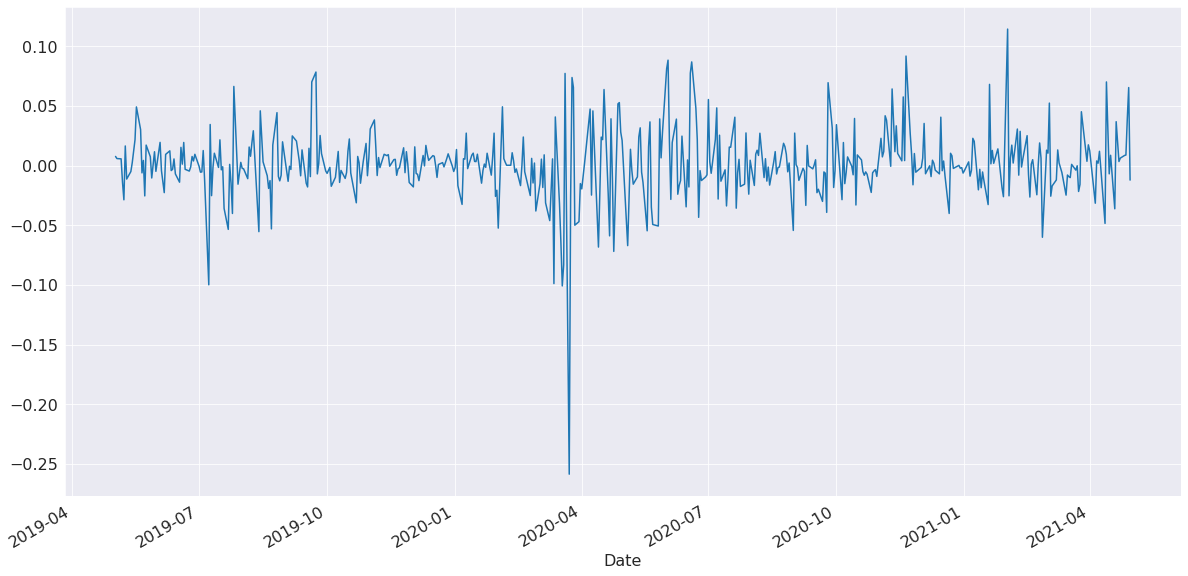

In [62]:
bajaj_df2['Return'].plot(figsize = (20, 10))

In [63]:
# Calculating monthly return
monthly_return = bajaj_df2['Close'].resample('M').ffill().pct_change()
monthly_return

Date
2019-04-30         NaN
2019-05-31    0.088758
2019-06-30    0.041121
2019-07-31   -0.167373
2019-08-31    0.003057
2019-09-30    0.195722
2019-10-31   -0.044479
2019-11-30    0.119973
2019-12-31    0.031075
2020-01-31    0.005115
2020-02-29   -0.041376
2020-03-31   -0.492727
2020-04-30    0.111768
2020-05-31   -0.137030
2020-06-30    0.326965
2020-07-31    0.061718
2020-08-31   -0.002506
2020-09-30   -0.054601
2020-10-31   -0.047648
2020-11-30    0.571508
2020-12-31    0.016846
2021-01-31   -0.020615
2021-02-28    0.106142
2021-03-31    0.002073
2021-04-30    0.142011
Freq: M, Name: Close, dtype: float64

In [64]:
monthly_return.max()

0.5715080290661163

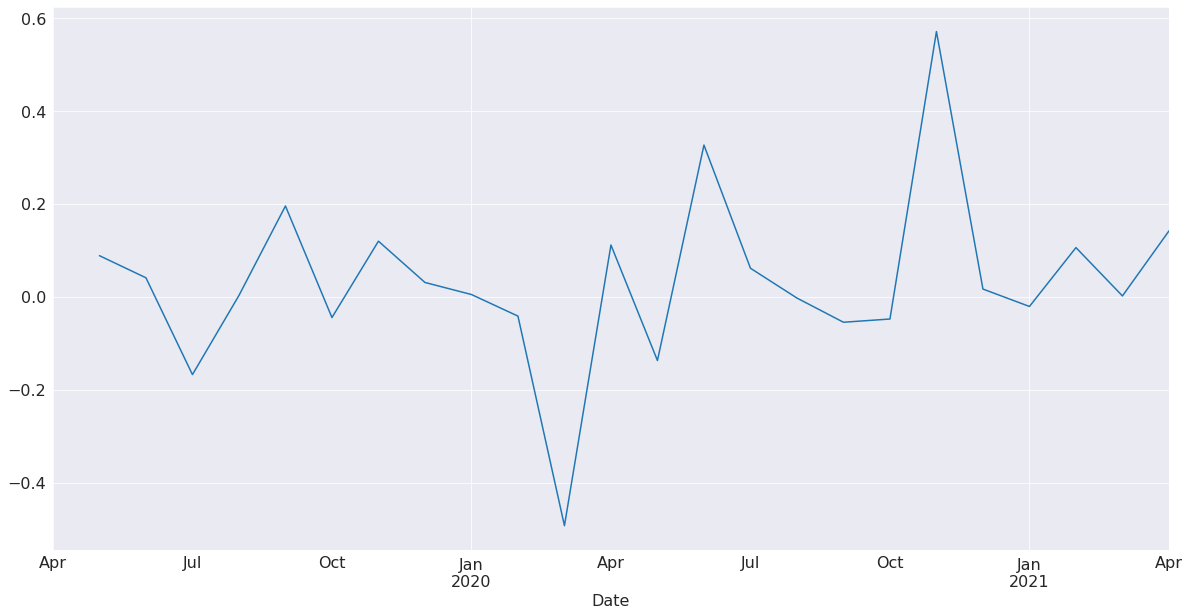

In [65]:
monthly_return.plot(figsize = (20, 10));

In [66]:
# Yearly return for 2020 and 2021 (April)
yearly_return = bajaj_df2['Close'].resample('Y').ffill().pct_change()
yearly_return

Date
2019-12-31         NaN
2020-12-31   -0.051845
2021-12-31    0.239750
Freq: A-DEC, Name: Close, dtype: float64

# **EDA with defined x-axis**

In [ ]:
bajaj_df = pd.read_csv('/content/drive/MyDrive/stock_analysis/BAJAJFINSV.csv', parse_dates = ['Date'], index_col = 'Date')

Text(0.5, 1.0, 'Trades')

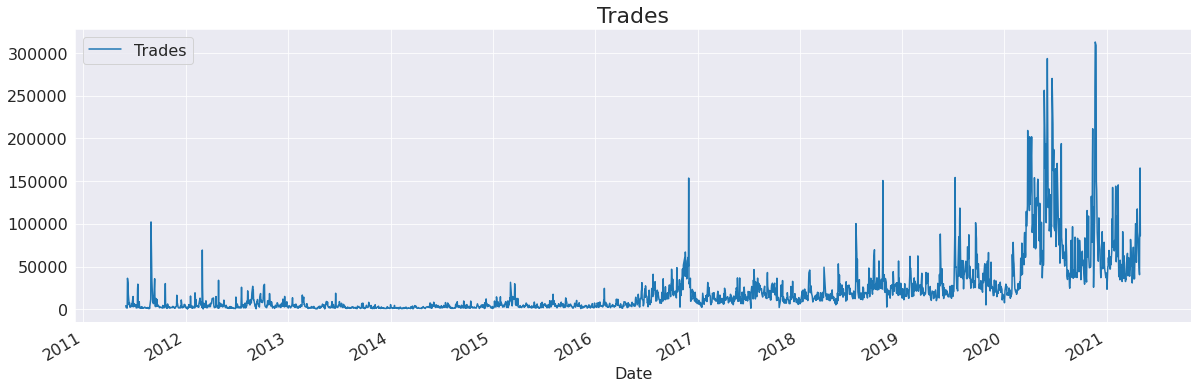

In [ ]:
ax = bajaj_df[['Trades']].plot(figsize = (20, 6))
ax.set_title('Trades', fontsize = 22)

In [ ]:
bajaj_df['Trades'].ffill(axis = 0) 
trade_data = bajaj_df.loc[bajaj_df.index <= '2019']
mean = round(trade_data['Trades'].mean(), 1)
bajaj_df["Trades"].fillna(value = mean, inplace = True)

Text(0.5, 1.0, 'Turnover')

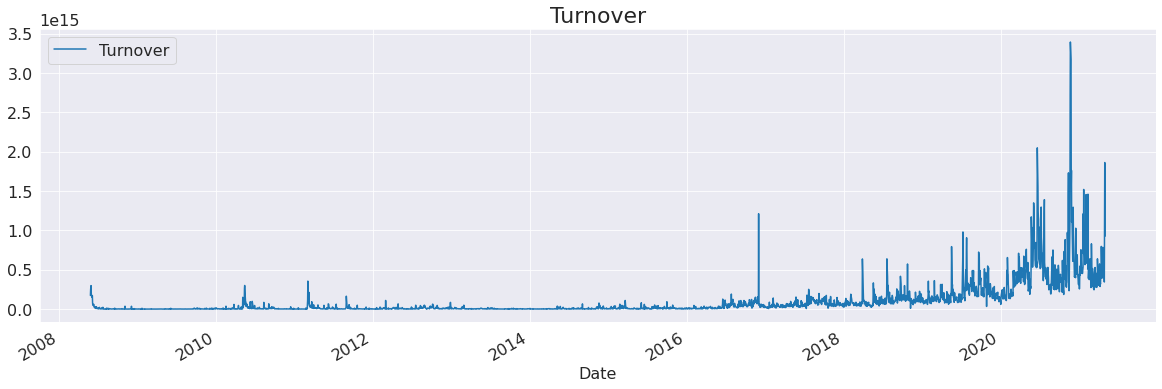

In [ ]:
ax = bajaj_df[['Turnover']].plot(figsize = (20, 6))
ax.set_title('Turnover', fontsize = 22)

Text(0.5, 1.0, 'Volume')

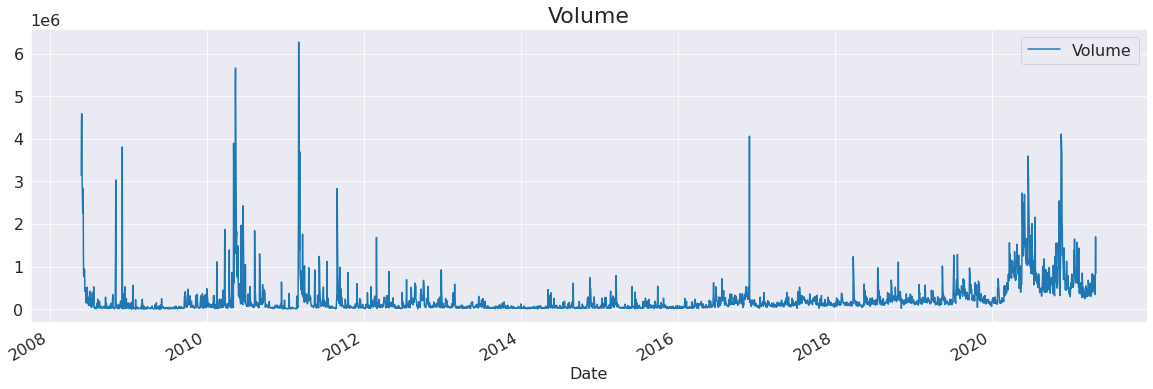

In [ ]:
ax = bajaj_df[['Volume']].plot(figsize = (20, 6))
ax.set_title('Volume', fontsize = 22)

The volume of shares traded showed a sharp growth during the period of 20-21

Text(0.5, 1.0, 'High v/s Low')

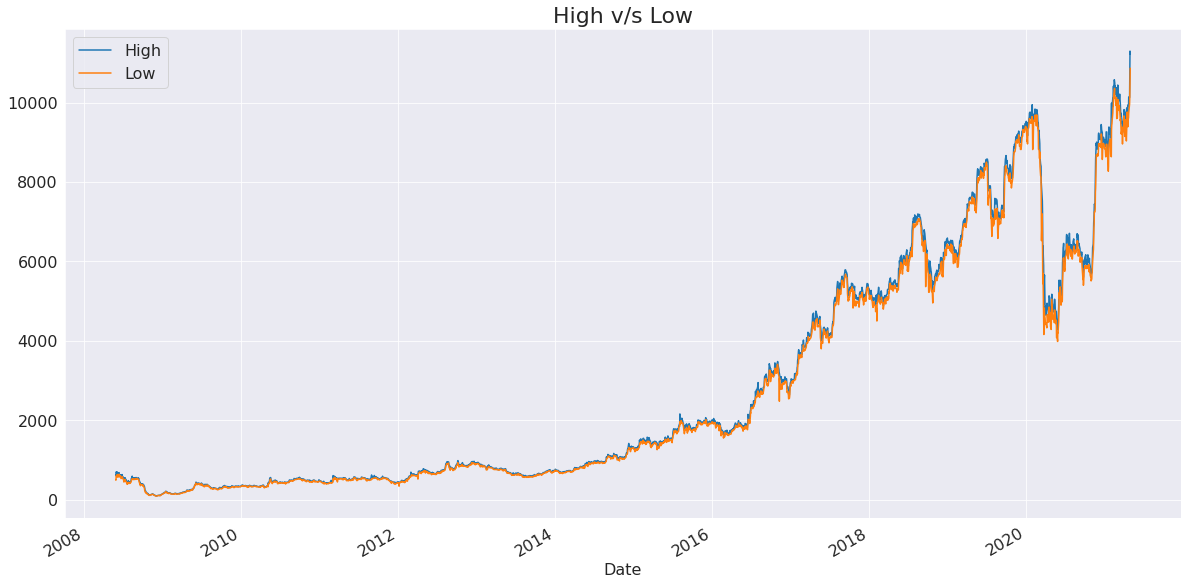

In [ ]:
ax = bajaj_df[['High', 'Low']].plot(figsize = (20, 10))
ax.set_title('High v/s Low', fontsize = 22)

Text(0.5, 1.0, 'VWAP')

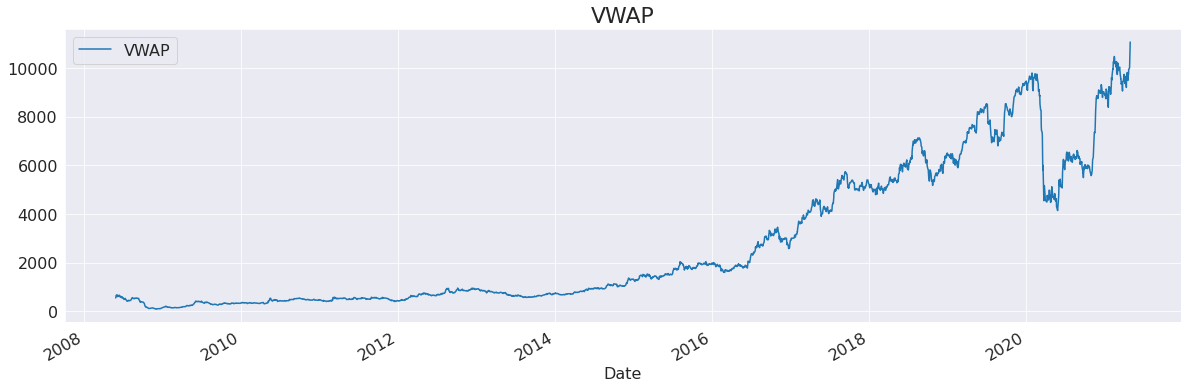

In [ ]:
ax = bajaj_df[['VWAP']].plot(figsize = (20, 6))
ax.set_title('VWAP', fontsize = 22)

Even though turnover and volume increased during the year 20-21, the prices dropped significantly. This explains the fact that, due to the pandemic Covid-19, many investors took the advantage of dropping prices to buy stocks in bulk, perhaps looking forward to sell when industries regain momentum.

Text(0.5, 1.0, 'End of year VWAP for Bajaj Finserv')

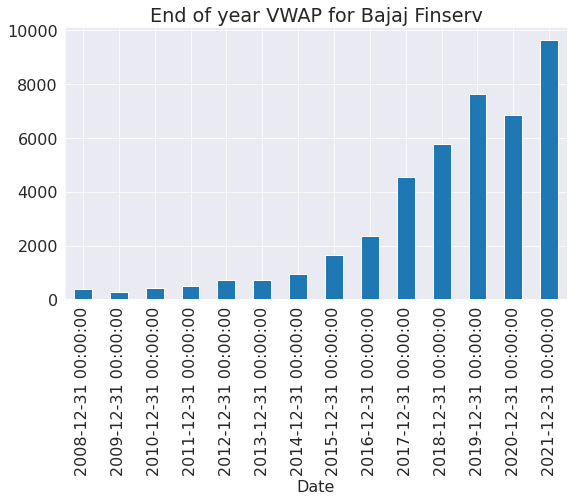

In [ ]:
bajaj_df['VWAP'].resample('A').mean().plot(kind = 'bar')
plt.title('End of year VWAP for Bajaj Finserv')

Text(0.5, 1.0, 'Yearly Mean VWAP for Bajaj Finserv')

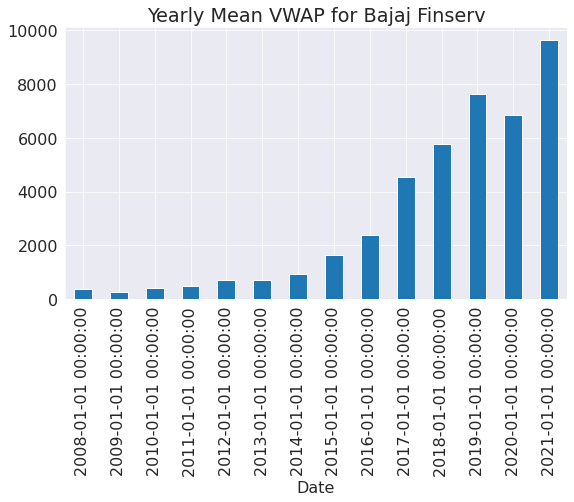

In [ ]:
bajaj_df['VWAP'].resample('AS').mean().plot(kind = 'bar')
plt.title('Yearly Mean VWAP for Bajaj Finserv')

Text(0.5, 1.0, 'Monthly Mean 2010 VWAP for Bajaj Finserv')

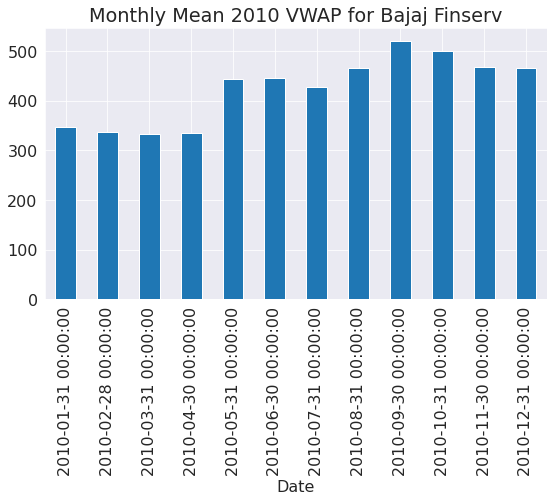

In [ ]:
bajaj_df['VWAP']['2010'].resample('M').mean().plot(kind = 'bar')
plt.title('Monthly Mean 2010 VWAP for Bajaj Finserv')

Box-Cox Transformation - to generate a uniform distribution

Lambda: -0.031969


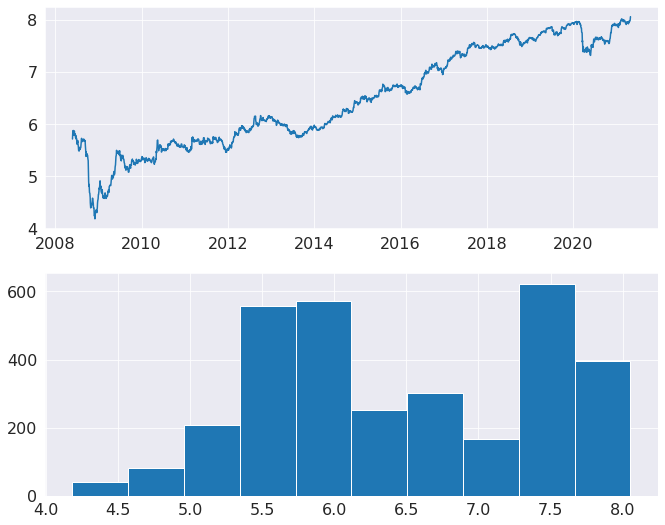

In [ ]:
from scipy.stats import boxcox
from pylab import rcParams
from matplotlib import pyplot

bajaj_df['vwap_boxcox'], lam = boxcox(bajaj_df['VWAP'])
print('Lambda: %f' % lam)
rcParams['figure.figsize'] = 11, 9
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(bajaj_df['vwap_boxcox'])
# histogram
pyplot.subplot(212)
pyplot.hist(bajaj_df['vwap_boxcox'])
pyplot.show()

# **SARIMAX**

When the data id indexed in a form where the data points are the magnitude of changes occurring with time, that data can be considered as the time-series data.

Time series are chronologic sequence of data, it has four different components as below:
1. Level - Average value in the series
2. Trend - It represents if it goes up, down or remain constant
3. Seasonality - Shows if any pattern exists through the seasons (periods)
4. Noise - White noise present during sampling or random factors such as politics, natural disasters, strikes etc.

Stationarity is a property of time series that represents trend and seasonality constant while seasonality shows periodic fluctuations.

Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors, or SARIMAX, is an extension of the ARIMA class of models.

In [67]:
from datetime import datetime

In [68]:
date_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

In [69]:
bajaj_df = pd.read_csv('/content/drive/MyDrive/stock_analysis/BAJAJFINSV.csv', parse_dates = ['Date'], date_parser = date_parser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [70]:
bajaj_df = bajaj_df[bajaj_df['Date'] >= '2020-09-01']
bajaj_df = bajaj_df.set_index('Date')

In [71]:
bajaj_df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-09-01,BAJAJFINSV,EQ,6190.35,6250.0,6396.75,6146.55,6356.05,6359.60,6291.31,807355,5.079320e+14,66529.0,118657,0.1470
2020-09-02,BAJAJFINSV,EQ,6359.60,6367.0,6415.00,6255.00,6360.30,6365.05,6333.48,443995,2.812032e+14,36238.0,48159,0.1085
2020-09-03,BAJAJFINSV,EQ,6365.05,6390.0,6455.00,6300.00,6370.00,6355.55,6382.20,394268,2.516298e+14,36871.0,54441,0.1381
2020-09-04,BAJAJFINSV,EQ,6355.55,6250.0,6422.95,6201.00,6301.60,6277.20,6308.02,544380,3.433958e+14,45681.0,45704,0.0840
2020-09-07,BAJAJFINSV,EQ,6277.20,6324.0,6349.25,6212.00,6263.85,6263.65,6280.59,498573,3.131331e+14,43818.0,78383,0.1572


In [72]:
X_bajaj = bajaj_df.loc[:,['Trades']]

In [73]:
X_bajaj

,Trades
Date,
2020-09-01,66529.0
2020-09-02,36238.0
2020-09-03,36871.0
2020-09-04,45681.0
2020-09-07,43818.0
...,...
2021-04-26,45113.0
2021-04-27,40414.0
2021-04-28,126354.0


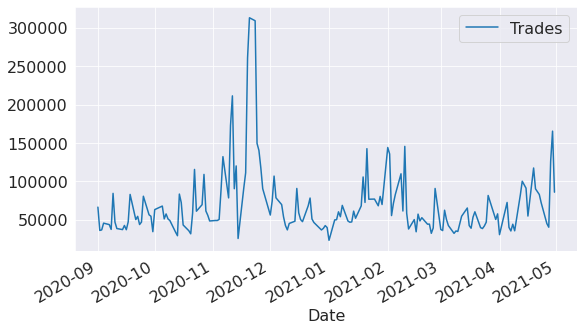

In [75]:
X_bajaj.plot()

**Augmented Dickey-Fuller test**

The importance of this test lies on avoiding spurious regressions, so the model fits the data as much as possible. The importance of this test lies on avoiding spurious regressions, so the model fits the data as much as possible.
the Augmented Dickey-Fuller test says that if the p-value is below of one critical values, then we can't reject the null hypothesis, meaning that the model has a unit root.

In [92]:
def test_stationarity(x):
  rollmean = x.rolling(window = 12).mean()
  rollstd = x.rolling(window = 12).std()
  plt.plot(x, color = 'blue', label = 'Original')
  plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
  plt.plot(rollstd, color = 'black', label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean % Standard Deviation')
  plt.xticks(rotation = 45)
  plt.show(block = False)

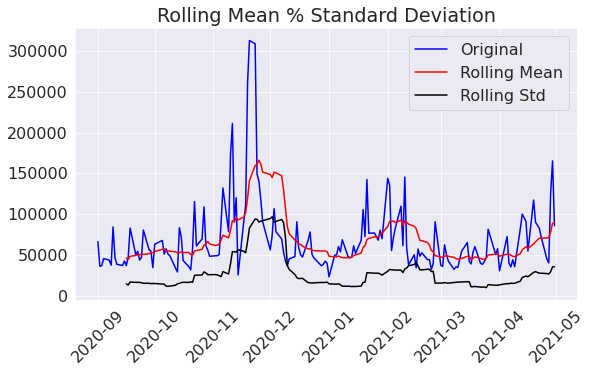

In [93]:
test_stationarity(X_bajaj)

In [88]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(X_bajaj.Trades, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : {%.3f}"%float(dftest[1]))
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -5.726308969998888
2. P-Value : {0.000}
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 164
5. Critical Values :
	 1% :  -3.47086589632514
	 5% :  -2.879330279087651
	 10% :  -2.57625492712671


**p-value is low for our dataset, thus we can say that the evidence of the null hypothesis is high; hence the time series is stationary.**

In [ ]:
X_bajaj.shape

(165, 1)

In [ ]:
from pandas.tseries.offsets import DateOffset

Creating a next 1 month dates to predict the values

In [ ]:
def future_dates(X):
  future_dates = [X.index[-1] + DateOffset(days = x) for x in range(0, 30)]
  future_dates_df = pd.DataFrame(index = future_dates[1:], columns = X.columns)
  return future_dates_df

In [ ]:
bajaj_future_df = pd.concat([X_bajaj, future_dates(X_bajaj)])

SARIMAX model

In [ ]:
import statsmodels.api as sm

In [ ]:
def model_train(X, order):
  model = sm.tsa.statespace.SARIMAX(X['Trades'], order = order, seasonal_order = (3, 1, 4, 12))
  results = model.fit()
  return results

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


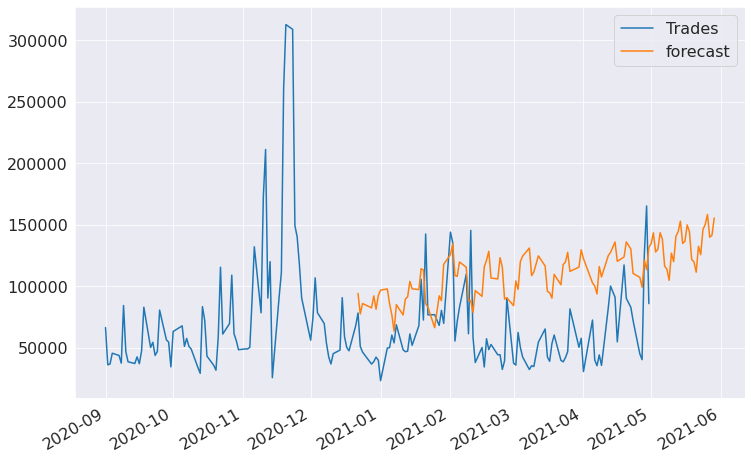

In [ ]:
results = model_train(bajaj_future_df, order = (3,1,4))
bajaj_future_df['forecast'] = results.predict(start = 78, dynamic = True)
bajaj_future_df[['Trades','forecast']].plot(figsize = (12, 8))

# **Prophet**

Prophet is an Additive Regressive Model

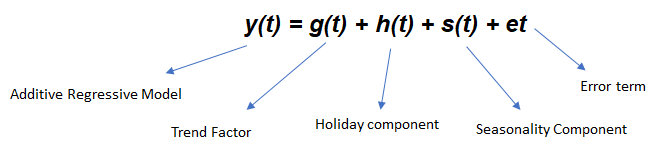

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

In [ ]:
bajaj_df = pd.read_csv('/content/drive/MyDrive/stock_analysis/BAJAJFINSV.csv')

In [ ]:
bajaj_df = bajaj_df[['Date', 'VWAP']]

In [ ]:
bajaj_df.columns

Index(['Date', 'VWAP'], dtype='object')

In [ ]:
bajaj_df.columns = ['ds', 'y']

In [ ]:
bajaj_df['ds'] = pd.to_datetime(bajaj_df.ds, format = '%Y-%m')

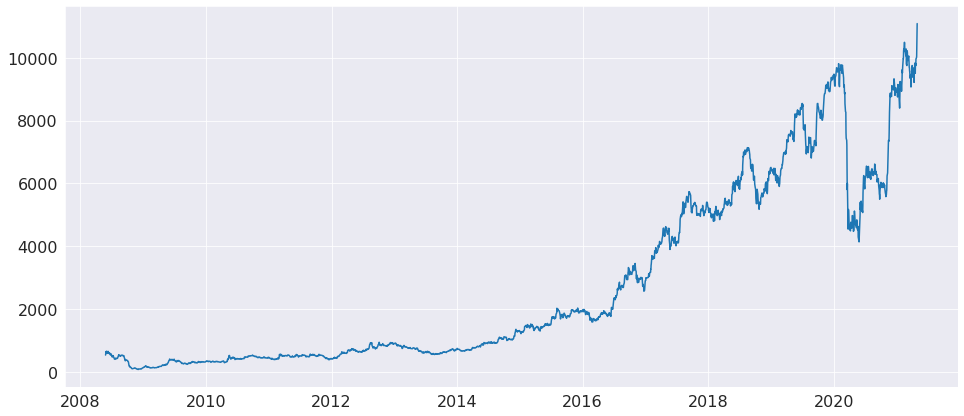

In [ ]:
plt.figure(figsize = (16, 7))
plt.plot(bajaj_df.ds, bajaj_df.y)
plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
m = Prophet(interval_width = 0.95)
m.fit(bajaj_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods = 50, freq = 'MS')

In [ ]:
forecast = m.predict(future)

In [ ]:
preds = forecast['yhat'][:-50]

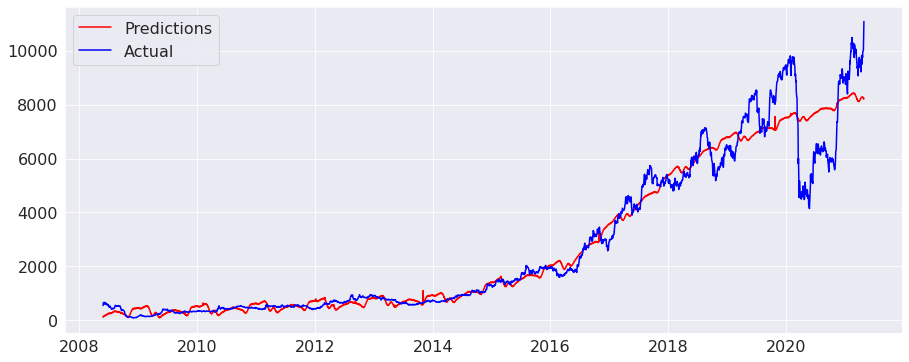

In [ ]:
plt.figure(figsize = (15, 6))
plt.plot(bajaj_df.ds, preds, color = 'red', label = 'Predictions')
plt.plot(bajaj_df.ds, bajaj_df.y, color = 'blue', label = 'Actual')
plt.legend()
plt.show()

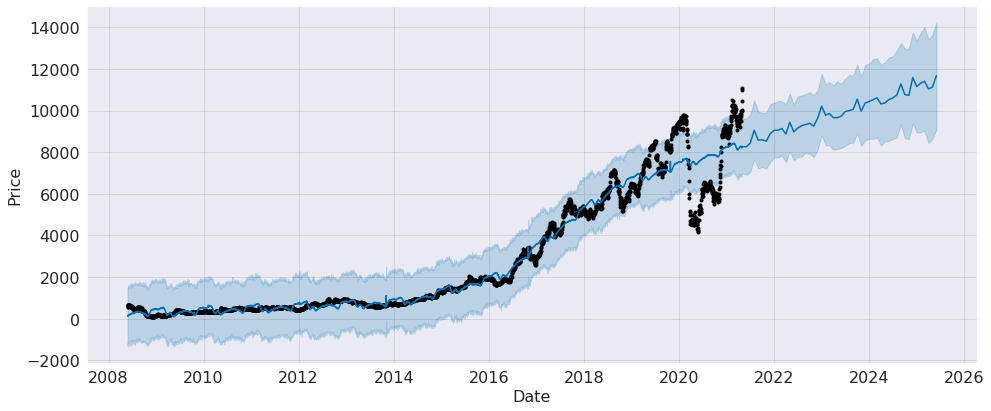

In [ ]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')
figure.set_size_inches(15, 6)

# **SMA**

Simple Moving Average is simply the average price over a specified period. The 50-day simple moving average (SMA) is popular with traders and market analysts because historical analysis of price movements shows it to be effective trend indicator.

In [ ]:
bajaj_df = pd.read_csv('/content/drive/MyDrive/stock_analysis/BAJAJFINSV.csv', parse_dates = ['Date'], index_col = 'Date')

In [ ]:
bajaj_df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [ ]:
sma30 = pd.DataFrame()
sma30['Close'] = bajaj_df['Close'].rolling(window = 30).mean()
sma30

,Close
Date,
2008-05-26,NaN
2008-05-27,NaN
2008-05-28,NaN
2008-05-29,NaN
2008-05-30,NaN
...,...
2021-04-26,9617.065000
2021-04-27,9621.138333
2021-04-28,9637.733333


In [ ]:
#create a simple moving 100 day average
sma100 = pd.DataFrame()
sma100['Close'] = bajaj_df['Close'].rolling(window=100).mean()
sma100

,Close
Date,
2008-05-26,NaN
2008-05-27,NaN
2008-05-28,NaN
2008-05-29,NaN
2008-05-30,NaN
...,...
2021-04-26,9430.5110
2021-04-27,9443.3575
2021-04-28,9460.6625


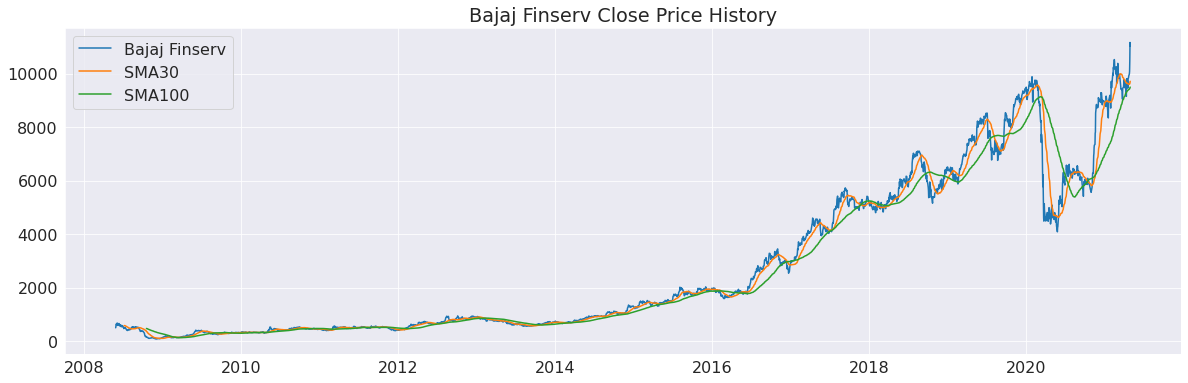

In [ ]:
plt.figure(figsize = (20, 6))
plt.plot(bajaj_df['Close'], label = 'Bajaj Finserv')
plt.plot(sma30['Close'], label = 'SMA30')
plt.plot(sma100['Close'], label = 'SMA100')
plt.title('Bajaj Finserv Close Price History')
plt.legend(loc = 'best')
plt.show()

In [ ]:
data = pd.DataFrame()
data['BajajFinserv'] = bajaj_df['Close']
data['SMA30'] = sma30['Close']
data['SMA100'] = sma100['Close']
data

,BajajFinserv,SMA30,SMA100
Date,,,
2008-05-26,509.10,NaN,NaN
2008-05-27,554.65,NaN,NaN
2008-05-28,640.95,NaN,NaN
2008-05-29,632.40,NaN,NaN
2008-05-30,644.00,NaN,NaN
...,...,...,...
2021-04-26,10001.75,9617.065000,9430.5110
2021-04-27,10091.35,9621.138333,9443.3575
2021-04-28,10489.30,9637.733333,9460.6625


In [ ]:
data.isna().sum()

BajajFinserv     0
SMA30           29
SMA100          99
dtype: int64

In [ ]:
data = data[1000:3201]

In [ ]:
#creating a function to signal buy/sell
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['BajajFinserv'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['BajajFinserv'][i])
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return (sigPriceBuy, sigPriceSell)

In [ ]:
#Store buy/sell data into variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data

,BajajFinserv,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2012-10-31,851.55,855.746667,777.1625,851.55,NaN
2012-11-01,860.95,858.940000,779.1825,NaN,NaN
2012-11-02,856.95,862.071667,781.2065,NaN,NaN
2012-11-05,855.60,865.195000,783.1370,NaN,NaN
2012-11-06,849.85,867.540000,785.0145,NaN,NaN
...,...,...,...,...,...
2021-04-26,10001.75,9617.065000,9430.5110,NaN,NaN
2021-04-27,10091.35,9621.138333,9443.3575,NaN,NaN
2021-04-28,10489.30,9637.733333,9460.6625,NaN,NaN


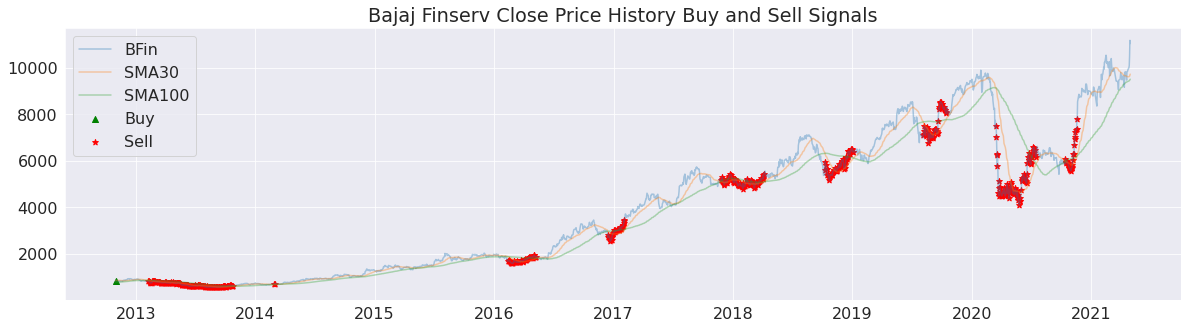

In [ ]:
#visualise data and strategy to buy and sell stock
plt.figure(figsize = (20, 5))
plt.plot(data['BajajFinserv'], label = 'BFin', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = '*', color = 'red')
plt.title('Bajaj Finserv Close Price History Buy and Sell Signals')
plt.legend(loc = 'upper left')
plt.show()

# **CNN-LSTM**

In [75]:
import requests 
from tqdm import tqdm
import csv

In [76]:
key = 'LN5N079VYDL70691'

In [79]:
def request_stock_price_list(symbol, size, token):
  q_string = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={}&outputsize={}&apikey={}'
  print('Retrieving stock price data from Alpha Vantage (This may take a while)...')
  r = requests.get(q_string.format(symbol, size, token))
  print('Data has been successfully downloaded....')
  date = []
  colnames = list(range(0, 5))
  df = pd.DataFrame(columns = colnames)
  print('Sorting the retrieved data into a dataframe....')
  for i in tqdm(r.json()['Time Series (Daily)'].keys()):
    date.append(i)
    row = pd.DataFrame.from_dict(r.json()['Time Series (Daily)'][i], orient = 'index').reset_index().T[1:]
    df = pd.concat([df, row], ignore_index = True)
  df.columns = ['open', 'high', 'low', 'close', 'volume']
  df['date'] = date
  return df

In [80]:
cv1 = request_stock_price_list('IBM', 'full', 'key')

Retrieving stock price data from Alpha Vantage (This may take a while)...
Data has been successfully downloaded....
Sorting the retrieved data into a dataframe....


100%|██████████| 5733/5733 [01:51<00:00, 51.51it/s]


In [81]:
print(cv1.head)

<bound method NDFrame.head of           open      high       low     close    volume        date
0     132.6200  134.0900  131.9800  134.0100   2767054  2022-08-12
1     132.3600  133.2250  132.0000  132.5400   3501925  2022-08-11
2     130.7500  131.7800  130.3400  131.5000   3663995  2022-08-10
3     129.9200  130.7900  129.1200  129.4700   3495991  2022-08-09
4     133.1000  133.3500  132.0200  132.6100   3825145  2022-08-08
...        ...       ...       ...       ...       ...         ...
5728   92.7500   92.9400   90.1900   90.2500  13737600  1999-11-05
5729   94.4400   94.4400   90.0000   91.5600  16697600  1999-11-04
5730   95.8700   95.9400   93.5000   94.3700  10369100  1999-11-03
5731   96.7500   96.8100   93.6900   94.8100  11105400  1999-11-02
5732   98.5000   98.8100   96.3700   96.7500   9551800  1999-11-01

[5733 rows x 6 columns]>


In [82]:
cv1.to_csv('/content/drive/MyDrive/stock_analysis/IBM.csv')

In [83]:
data = pd.read_csv('/content/drive/MyDrive/stock_analysis/IBM.csv')

In [84]:
data.head()

,Unnamed: 0,open,high,low,close,volume,date
0,0,132.62,134.090,131.98,134.01,2767054,2022-08-12
1,1,132.36,133.225,132.00,132.54,3501925,2022-08-11
2,2,130.75,131.780,130.34,131.50,3663995,2022-08-10
3,3,129.92,130.790,129.12,129.47,3495991,2022-08-09
4,4,133.10,133.350,132.02,132.61,3825145,2022-08-08


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


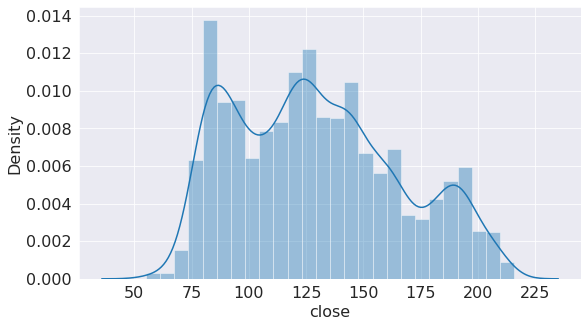

In [85]:
sns_plot = sns.distplot(data['close']);

Data must be converted into shape [100, 1] to make it easier for CNN to train on, else it won't select necessary features and the model will fail.

In [86]:
df = data

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = []
Y = []
window_size = 100
for i in range(1, len(df) - window_size - 1, 1):
  first = df.iloc[i, 2]
  temp = []
  temp2 = []
  for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
  temp2.append((df.iloc[i + window_size, 2] - first) / first)
  X.append(np.array(temp).reshape(100, 1))
  Y.append(np.array(temp2).reshape(1, 1))

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)

In [148]:
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4504
1127


In [149]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
113/113 [==============================] - 21s 99ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0537 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0404
Epoch 2/40
113/113 [==============================] - 7s 61ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0394 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0329
Epoch 3/40
113/113 [==============================] - 6s 54ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0374 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0328
Epoch 4/40
113/113 [==============================] - 6s 58ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0369 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0322
Epoch 5/40
113/113 [==============================] - 7s 63ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0363 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0306
Epoch 6/40
113/113 [==============================] - 4s 39ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0339 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0319
Epoch 7/4

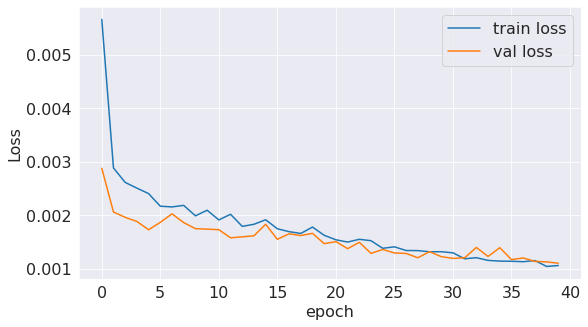

In [150]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

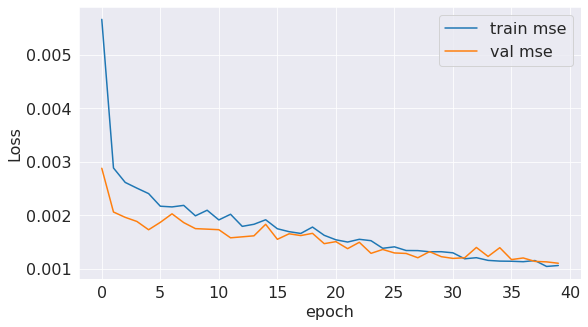

In [151]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

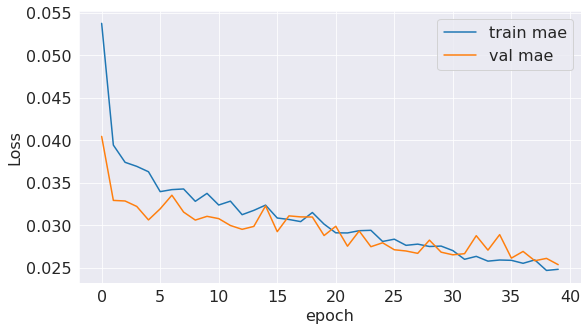

In [152]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

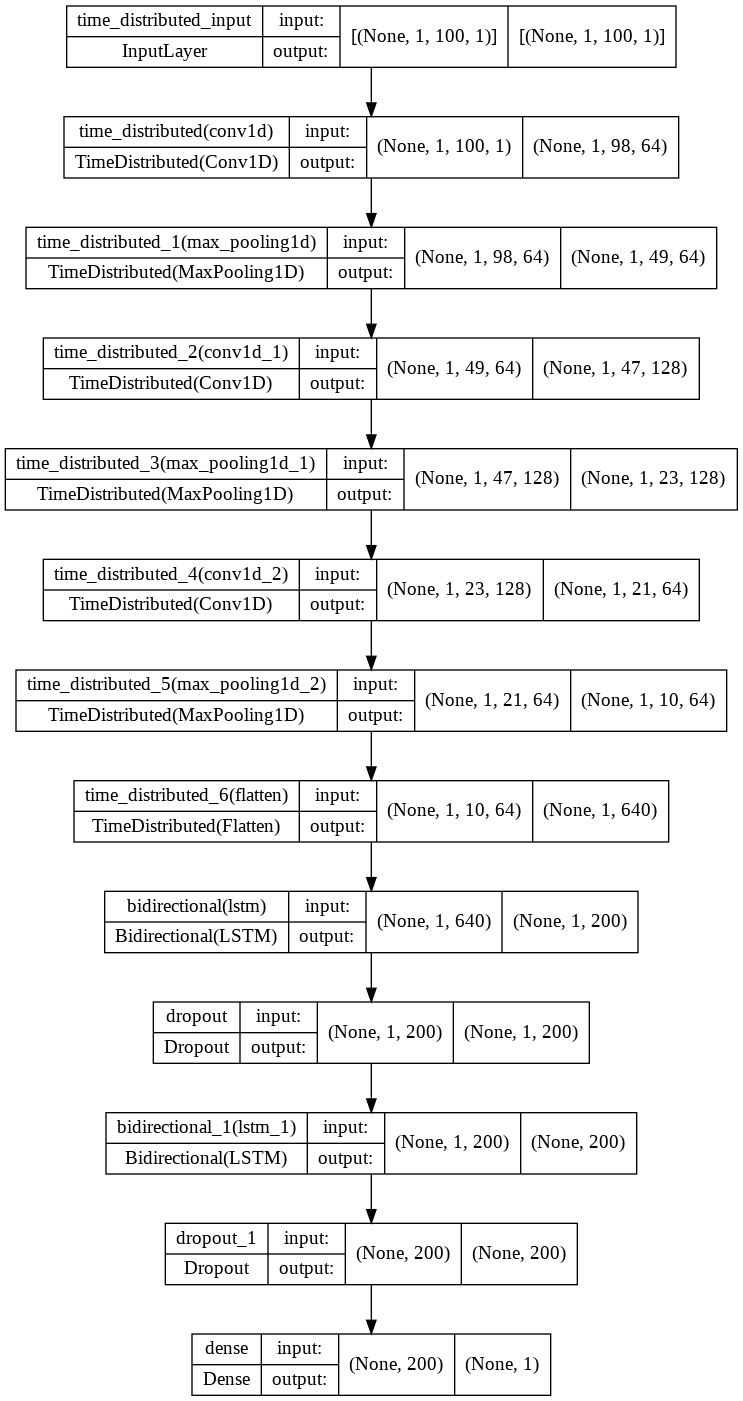

In [153]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [154]:
model.evaluate(test_X, test_Y)

36/36 [==============================] - 0s 10ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0253


[0.001105927163735032, 0.001105927163735032, 0.025346148759126663]

In [155]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.945280
R2 Score: 0.945280
Max Error: 0.146884


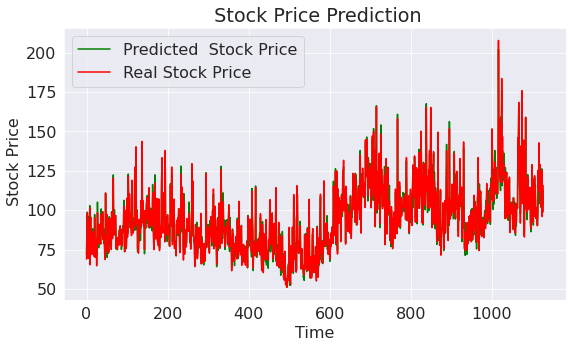

In [156]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [157]:
# First we need to save a model
model.save("/content/drive/MyDrive/stock_analysis/ibm_model.h5")

In [158]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/stock_analysis/ibm_model.h5")

In [159]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

# **LSTM**

In [4]:
bajaj_df = pd.read_csv('/content/drive/MyDrive/stock_analysis/BAJAJFINSV.csv', parse_dates = ['Date'], index_col = 'Date')

In [43]:
bajaj_finance_df = pd.read_csv('/content/drive/MyDrive/stock_analysis/BAJFINANCE.csv', parse_dates = ['Date'], index_col = 'Date')

In [58]:
closing_df1 = bajaj_df.filter(['Close'])
closing_df1.columns = ['BAJAJFINSV']

In [59]:
closing_df2 = bajaj_finance_df.filter(['Close'])
closing_df2.columns = ['BAJAJFIN']

In [60]:
result = pd.concat([closing_df1, closing_df2], axis=1, join='inner')

In [61]:
result.head()

,BAJAJFINSV,BAJAJFIN
Date,,
2008-05-26,509.10,271.00
2008-05-27,554.65,262.40
2008-05-28,640.95,268.25
2008-05-29,632.40,260.65
2008-05-30,644.00,263.90


In [62]:
tech_rets = result.pct_change() 
tech_rets.head()

,BAJAJFINSV,BAJAJFIN
Date,,
2008-05-26,NaN,NaN
2008-05-27,0.089472,-0.031734
2008-05-28,0.155594,0.022294
2008-05-29,-0.013340,-0.028332
2008-05-30,0.018343,0.012469


Comparing the daily percentage return of the two stocks to check how correlated they are with each other.

Comparing BAJAJFINSV to itself gives a perfectly linear relationship

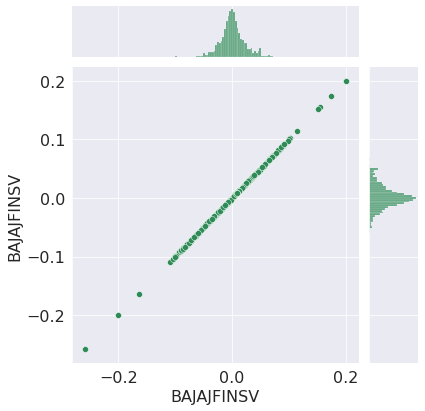

In [67]:
sns.jointplot(x = 'BAJAJFINSV', y = 'BAJAJFINSV', data = tech_rets, kind = 'scatter', color = 'seagreen');

Comparing BAJAJFINSV with BAJAJFINANCE

<Figure size 1080x1080 with 0 Axes>

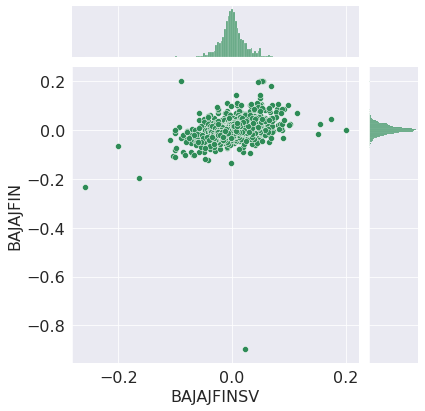

In [65]:
sns.jointplot(x = 'BAJAJFINSV', y = 'BAJAJFIN', data = tech_rets, kind = 'scatter', color = 'seagreen');

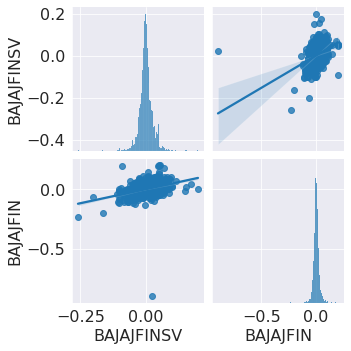

In [68]:
sns.pairplot(tech_rets, kind = 'reg')

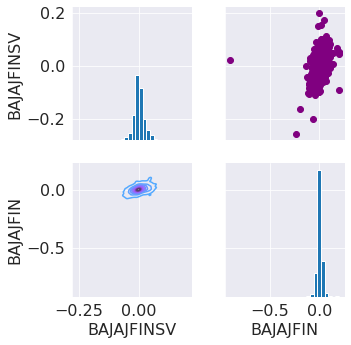

In [69]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

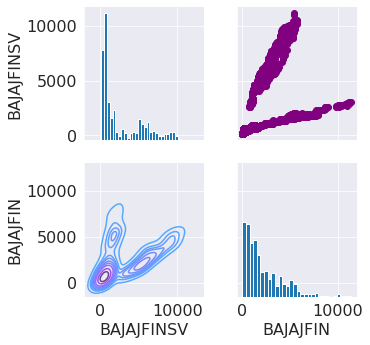

In [71]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(result)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

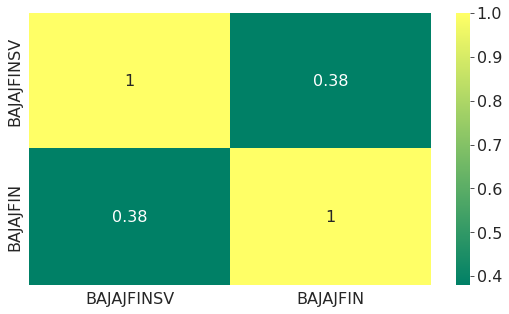

In [72]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

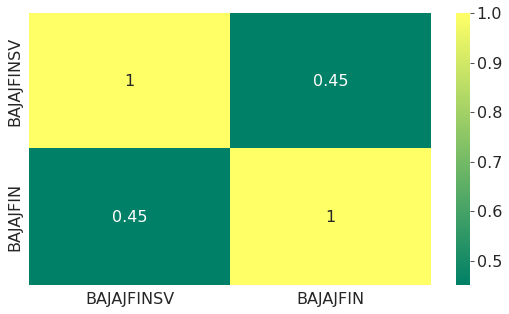

In [73]:
sns.heatmap(result.corr(), annot=True, cmap='summer')

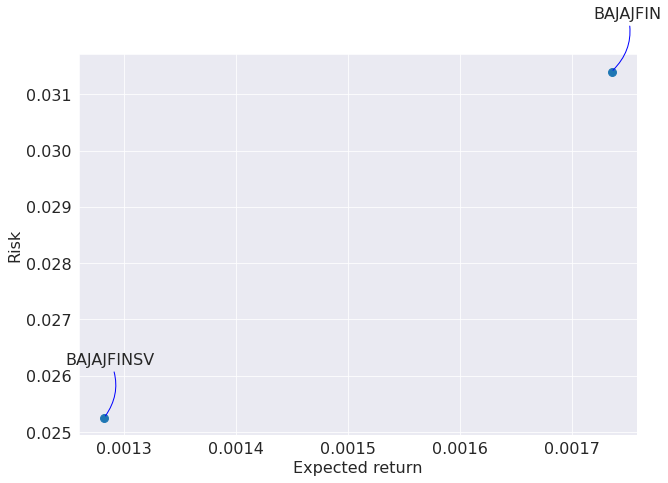

In [74]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [6]:
data = bajaj_df.filter(['Close'])

Convert the dataframe to a numpy array

In [7]:
dataset = data.values

In [8]:
training_data_len = int(np.ceil(len(dataset) * 0.95))

In [9]:
training_data_len

3041

In [10]:
from sklearn.preprocessing import MinMaxScaler

Scaling the data

In [12]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

In [13]:
scaled_data

array([[0.03773747],
       [0.04184633],
       [0.04963106],
       ...,
       [0.93800628],
       [1.        ],
       [0.98783128]])

Creating scaled training dataset

In [14]:
train_data = scaled_data[0:int(training_data_len), :]

Split the data into x_train and y_train datasets

In [17]:
x_train = []
y_train = []

In [19]:
for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60: i, 0])
  y_train.append(train_data[i, 0])

Converting the x_train and y_train to numpy arrays

In [20]:
x_train, y_train = np.array(x_train), np.array(y_train)

Reshaping the data

In [21]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(5962, 60, 1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

LSTM model

In [24]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
model.fit(x_train, y_train, batch_size = 1, epochs = 2)

5962/5962 [==============================] - 381s 63ms/step - loss: 6.7999e-04


In [27]:
test_data = scaled_data[training_data_len - 60:, :]

In [28]:
x_test = []
y_test = dataset[training_data_len:, :]

In [29]:
for i in range(60, len(test_data)): 
  x_test.append(test_data[i-60: i, 0])

In [30]:
x_test = np.array(x_test)

In [31]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [32]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [33]:
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

In [34]:
rmse

232.7228827660091

In [35]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


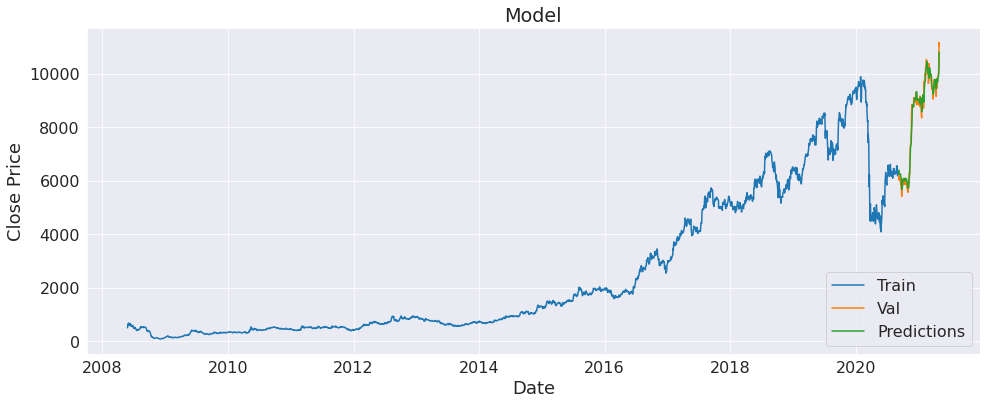

In [37]:
plt.figure(figsize = (16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [38]:
valid

,Close,Predictions
Date,,
2020-09-08,6234.25,6404.422363
2020-09-09,6026.80,6376.009277
2020-09-10,6129.25,6266.398926
2020-09-11,6128.40,6236.958008
2020-09-14,6112.15,6237.734863
...,...,...
2021-04-26,10001.75,9917.068359
2021-04-27,10091.35,9997.228516
2021-04-28,10489.30,10080.512695
